In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


job_postings_df = pd.read_csv("/Users/samde/Documents/DATA-1030-Final-Project/job_postings.csv")
job_postings_df.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,CONTRACT,NaN,NaN
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,NaN,NaN


In [131]:
job_postings_df.count()

job_id                        15886
company_id                    15520
title                         15886
description                   15885
max_salary                     5521
med_salary                      981
min_salary                     5521
pay_period                     6502
formatted_work_type           15886
location                      15886
applies                        8700
original_listed_time          15886
remote_allowed                 2340
views                         13123
job_posting_url               15886
application_url                9795
application_type              15886
expiry                        15886
closed_time                     928
formatted_experience_level    10984
skills_desc                     144
listed_time                   15886
posting_domain                 9044
sponsored                     15886
work_type                     15886
currency                       6502
compensation_type              6502
dtype: int64

In [132]:
# identify entries with hourly pay and monthly pay instead of salaried
hourly_entries = job_postings_df[job_postings_df['pay_period'] == 'HOURLY']
monthly_entries = job_postings_df[job_postings_df['pay_period'] == 'MONTHLY']

# convert hourly and monthly pays to annual salary
job_postings_df.loc[hourly_entries.index, 'max_salary'] = hourly_entries['max_salary'] * 2080
job_postings_df.loc[hourly_entries.index, 'min_salary'] = hourly_entries['min_salary'] * 2080
job_postings_df.loc[monthly_entries.index, 'max_salary'] = monthly_entries['max_salary'] * 12
job_postings_df.loc[monthly_entries.index, 'min_salary'] = monthly_entries['min_salary'] * 12

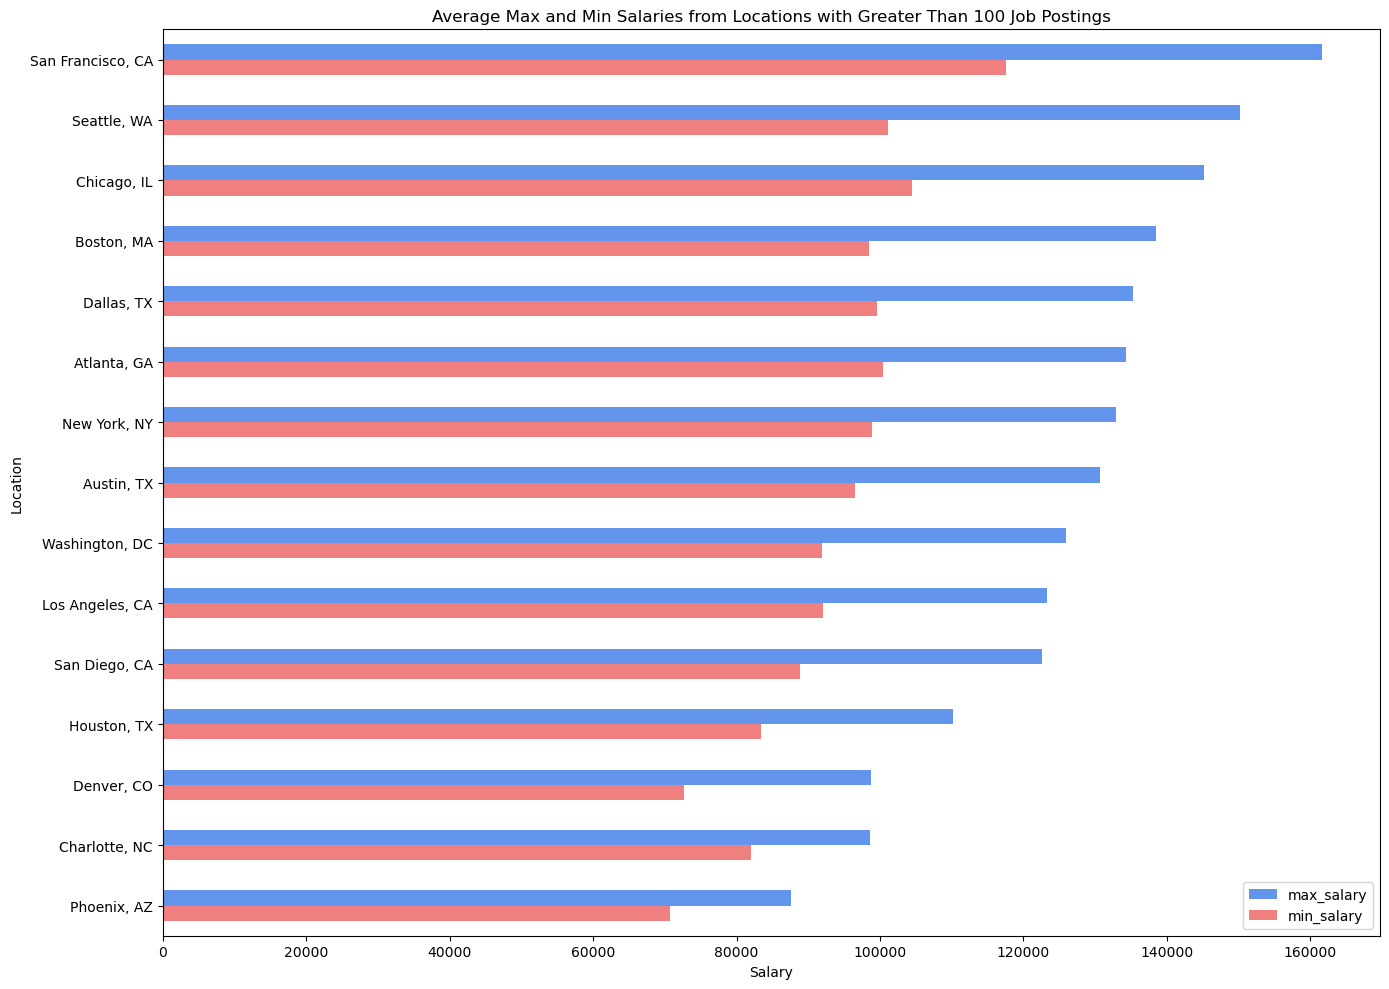

<Figure size 640x480 with 0 Axes>

In [134]:
# filter out United States from location
job_postings_df = job_postings_df[job_postings_df['location'] != 'United States']

# convert area names to cities
location_mapping = {
    "New York City Metropolitan Area": "New York, NY",
    "Greater Phoenix Area": "Phoenix, AZ",
    "San Francisco Bay Area": "San Francisco, CA",
    "Greater Orlando": "Orlando, FL",
    "Washington DC-Baltimore Area": "Washington, D.C.",
    "Greater Seattle Area": "Seattle, WA",
    "Greater Fort Collins Area": "Fort Collins, CO",
    "Greater Houston": "Houston, TX",
    "Atlanta Metropolitan Area": "Atlanta, GA"
}

job_postings_df['location'] = job_postings_df['location'].replace(location_mapping)


locations_with_sufficient_data_100 = job_postings_df['location'].value_counts()
locations_with_sufficient_data_100 = locations_with_sufficient_data_100[locations_with_sufficient_data_100 > 100].index.tolist()
filtered_df_100 = job_postings_df[job_postings_df['location'].isin(locations_with_sufficient_data_100)]

# calculate average max_salary and min_salary for all locations with more than 100 postings
avg_salaries_by_location_all_100 = filtered_df_100.groupby('location').agg({
    'max_salary': 'mean',
    'min_salary': 'mean'
}).sort_values(by = 'max_salary', ascending = False)

# visualize relationship between job location and salary for all locations with > 100 postings
fig, ax = plt.subplots(figsize = (14, 10))
avg_salaries_by_location_all_100.plot(kind = 'barh', ax=ax, color = ['cornflowerblue', 'lightcoral'])
ax.set_title('Average Max and Min Salaries from Locations with Greater Than 100 Job Postings')
ax.set_xlabel('Salary')
ax.set_ylabel('Location')
ax.invert_yaxis()  # to have the location with highest salary on top
plt.tight_layout()
plt.show()
fig = plt.figure()
fig.savefig('temp.png', dpi=fig.dpi)

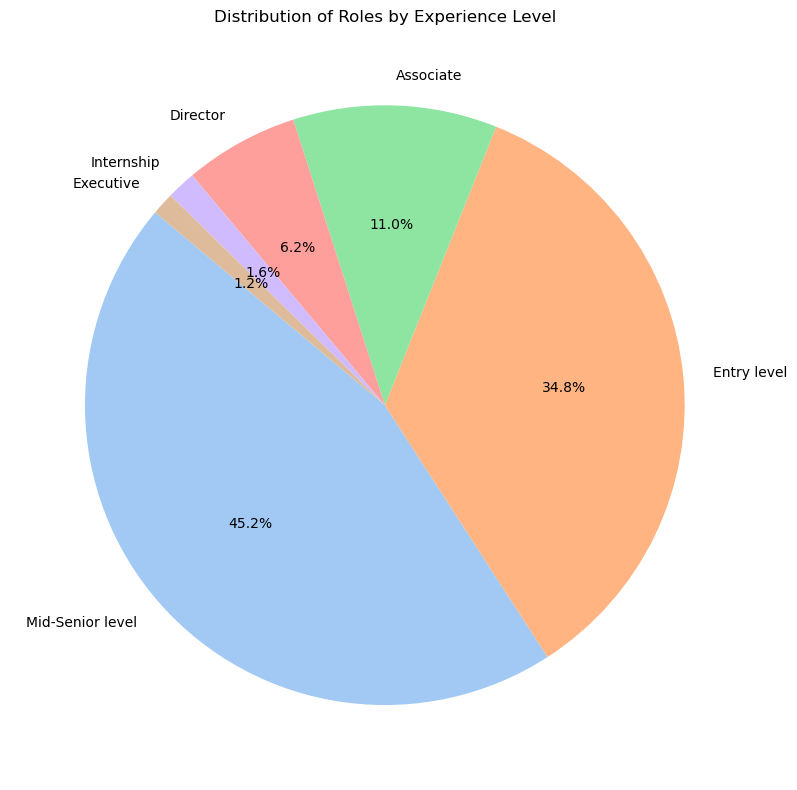

In [5]:
# Filter out rows where 'formatted_experience_level' is not available
experience_data = job_postings_df.dropna(subset=['formatted_experience_level'])

# Count the number of roles for each experience level
experience_counts = experience_data['formatted_experience_level'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(experience_counts, labels=experience_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Roles by Experience Level')
plt.tight_layout()
plt.show()

In [6]:
def career_grouping(title):
    title = title.lower()
    if 'software' in title and ('engineer' in title or 'engineering' in title):
        return 'Software Engineer'
    elif 'data' in title and 'scientist' in title:
        return 'Data Scientist'
    elif 'manager' in title:
        return 'Manager'
    elif 'analyst' in title:
        return 'Analyst'
    elif 'developer' in title:
        return 'Developer'
    elif 'consultant' in title:
        return 'Consultant'
    elif 'director' in title:
        return 'Director'
    else:
        return title

job_postings_df['career_group'] = job_postings_df['title'].apply(career_grouping)

# Filter job titles with more than 25 postings
titles_with_postings = job_postings_df['career_group'].value_counts()
titles_with_postings = titles_with_postings[titles_with_postings > 25].index.tolist()
filtered_titles_df = job_postings_df[job_postings_df['career_group'].isin(titles_with_postings)]

# Find top 10 refined grouped job titles based on average max_salary
top_titles_salary = filtered_titles_df.groupby('career_group')['max_salary'].mean()
top_titles_salary = top_titles_salary.sort_values(ascending=False).head(10).index.tolist()

boxplot_titles = filtered_titles_df[filtered_titles_df['career_group'].isin(top_titles_salary)]

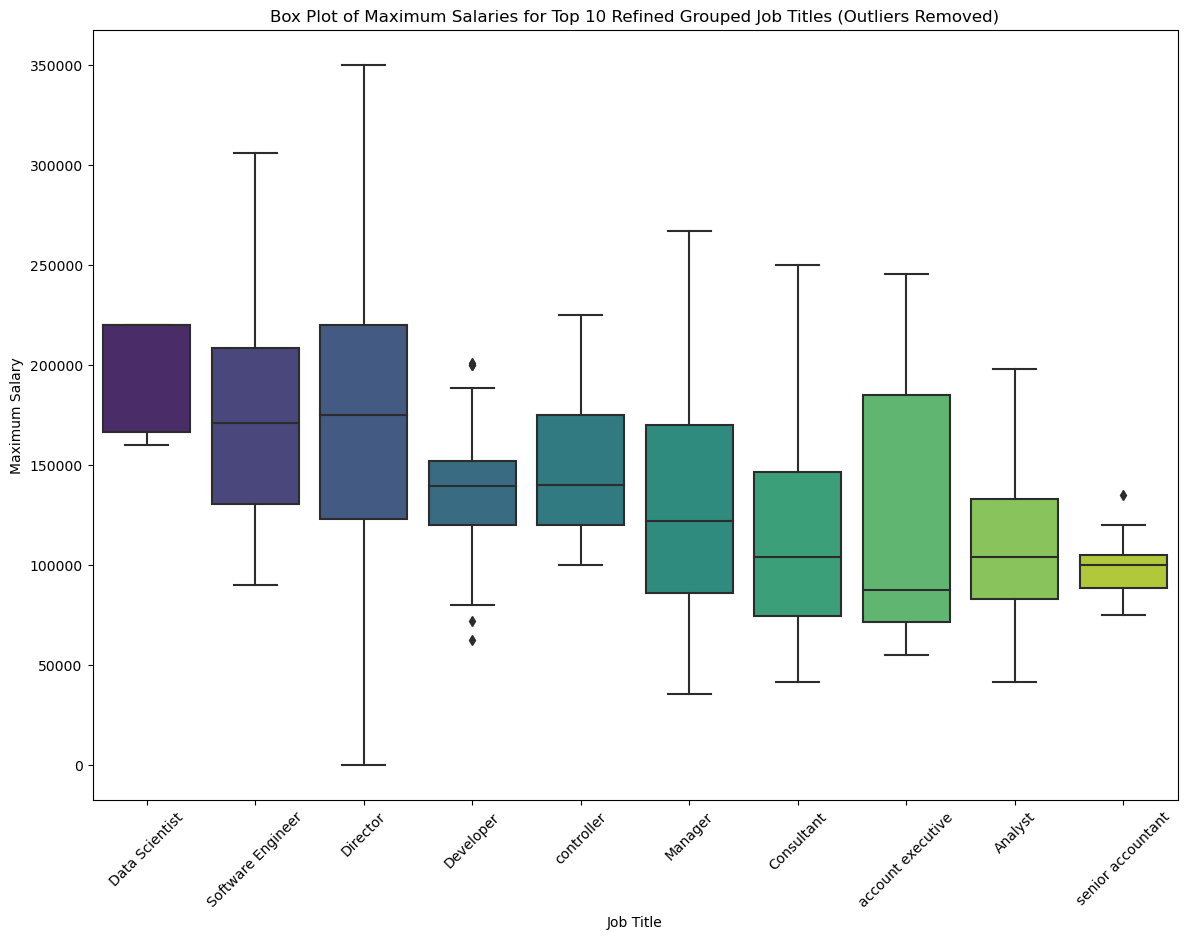

In [7]:
# Function that removes outliers based on 1.5 times IQR rule
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each of the top job titles
filtered_data = pd.concat([remove_outliers(boxplot_titles[boxplot_titles['career_group'] == title], 'max_salary') for title in top_titles_salary])
plt.figure(figsize=(14, 10))
sns.boxplot(data=filtered_data, x='career_group', y='max_salary', palette='viridis', order=top_titles_salary)
plt.title('Box Plot of Maximum Salaries for Top 10 Refined Grouped Job Titles (Outliers Removed)')
plt.xlabel('Job Title')
plt.ylabel('Maximum Salary')
plt.xticks(rotation=45)
plt.show()


Significance: A detailed look into the compensation packages of the top job titles is crucial for both employers and potential employees. This visualization not only showcases the median salaries but also offers insights into the spread, variation, and potential outliers in the compensation for these high-demand roles. It underscores the competitive nature of these roles and the variation in how different companies value them.

In [8]:
job_skills_df = pd.read_csv("/Users/samde/Documents/DATA-1030-Final-Project/job_skills.csv")

# Merging datasets on the "job_id" column
job_postings_df = pd.merge(job_postings_df, job_skills_df, on="job_id", how="left")


job_postings_df.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,career_group,skill_abr
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,licensed insurance agent,SALE
1,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,licensed insurance agent,BD
2,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN,Manager,SALE
3,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN,Manager,BD
4,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,NaN,NaN,1.690000e+12,NaN,0,CONTRACT,NaN,NaN,model risk auditor,ACCT


In [9]:
# Calculating average salaries for each skill
avg_salaries_by_skill = job_postings_df.groupby('skill_abr').agg({
    'max_salary': ['mean', 'median'],
    'min_salary': ['mean', 'median'],
    'job_id': 'count'
}).reset_index()
avg_salaries_by_skill.columns = ['Skill', 'Avg Max Salary', 'Median Max Salary', 'Avg Min Salary', 'Median Min Salary', 'Count']

# Sorting skills by average max salary
avg_salaries_by_skill = avg_salaries_by_skill.sort_values(by='Avg Max Salary', ascending=False)

# Displaying top 5 skills based on average max salary
avg_salaries_by_skill.head()

,Skill,Avg Max Salary,Median Max Salary,Avg Min Salary,Median Min Salary,Count
24,PRDM,171779.317073,182500.000,118207.195122,108333.0,140
31,STRA,167752.236893,170000.000,123787.687379,135000.0,189
6,CNSL,167463.769697,175000.000,115666.987879,118000.0,240
11,ENG,154453.794493,140000.000,109142.838905,104000.0,1616
25,PRJM,143000.386932,133696.375,103502.809848,100000.0,571


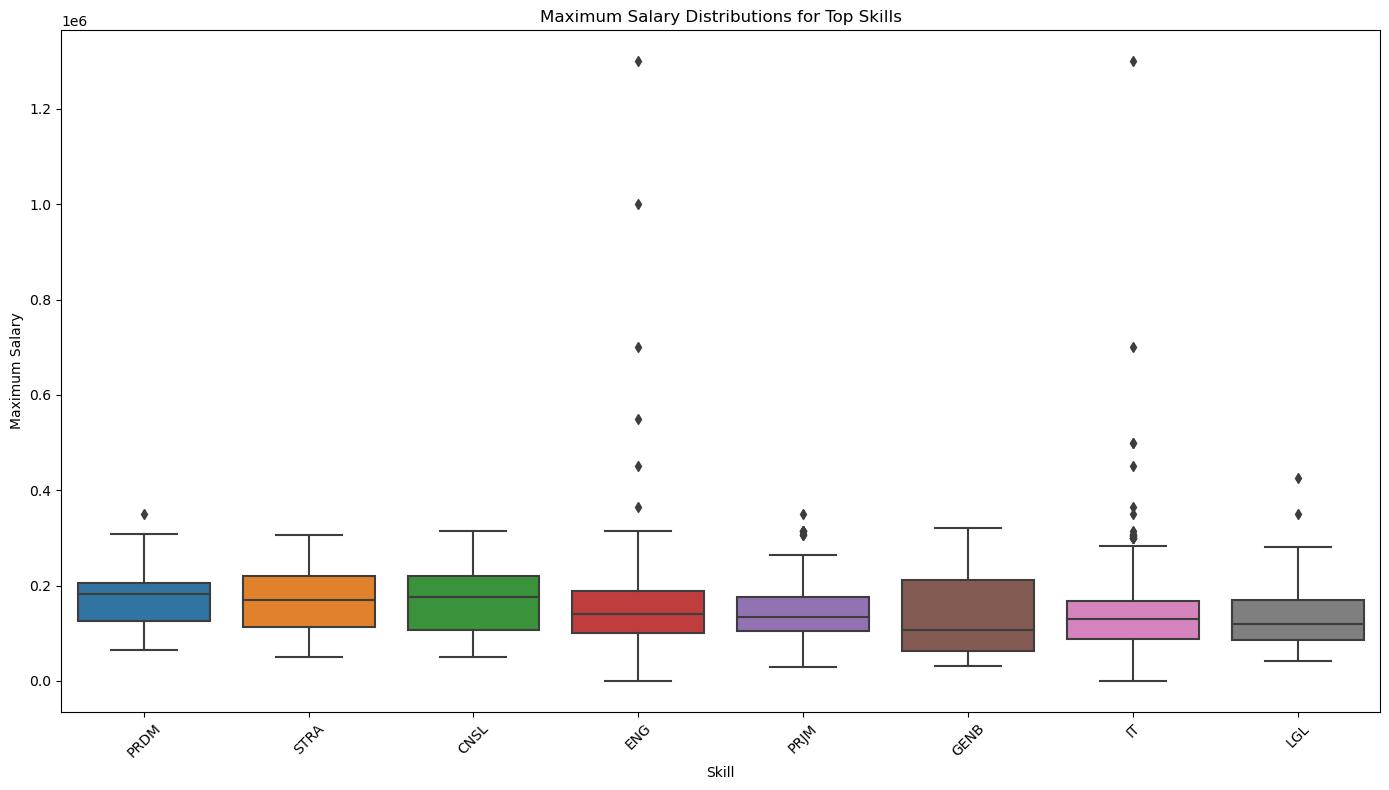

In [10]:
# Selecting top skills based on the previous analysis
top_skills = avg_salaries_by_skill['Skill'].head(8).tolist()

# Filtering merged dataset to only include the top skills
top_skills_df = job_postings_df[job_postings_df['skill_abr'].isin(top_skills)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=top_skills_df, x='skill_abr', y='max_salary', order=top_skills)
plt.title('Maximum Salary Distributions for Top Skills')
plt.xlabel('Skill')
plt.ylabel('Maximum Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

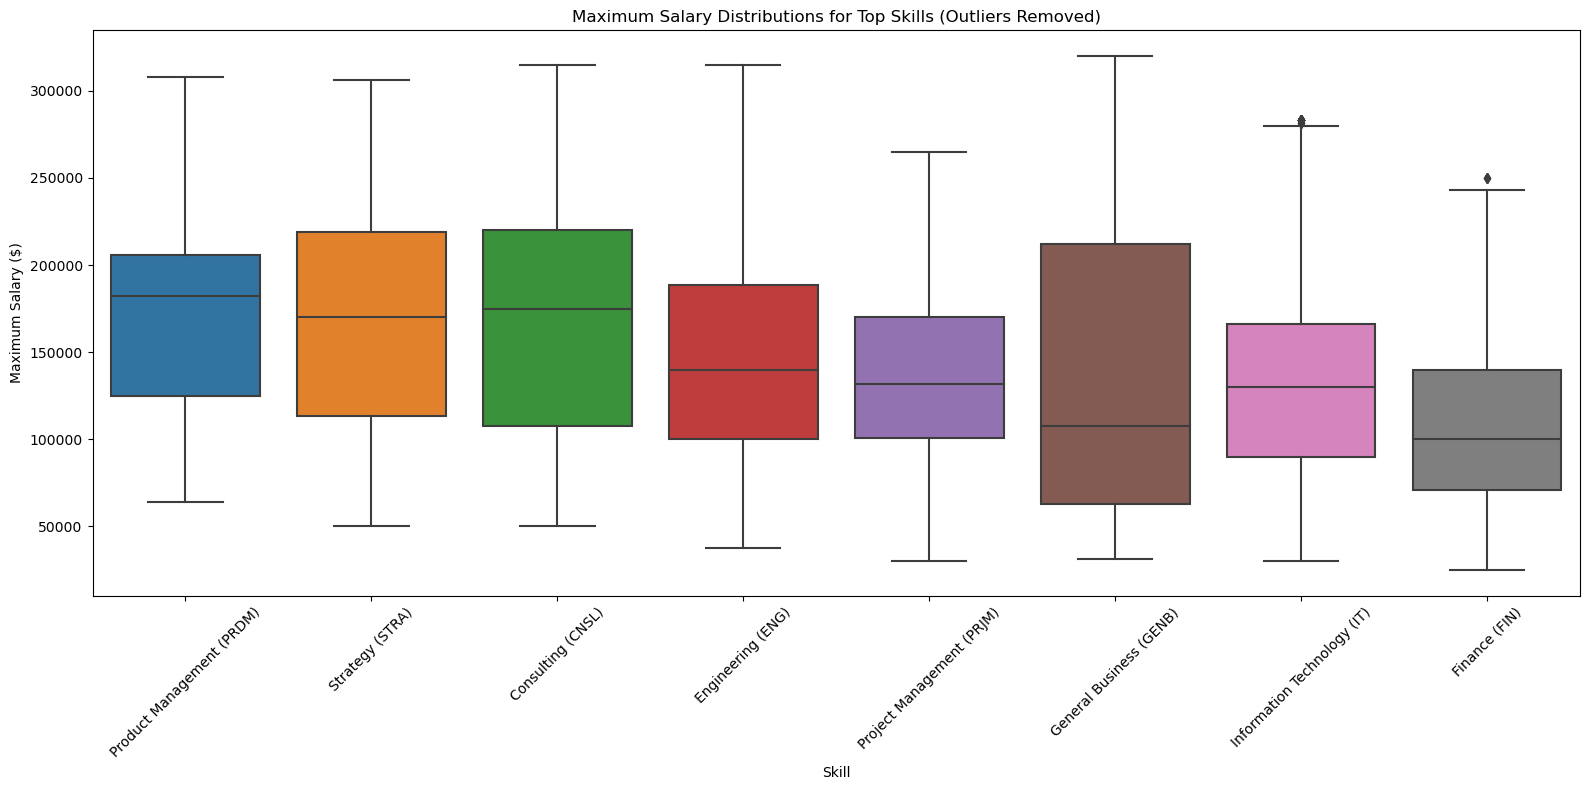

In [11]:
filtered_df = job_postings_df[~((job_postings_df['max_salary'] < 10000) & (job_postings_df['pay_period'] != 'hour') & (job_postings_df['pay_period'] != 'month'))]

# Filtering top skills from the filtered data
top_skills = ['PRDM', 'STRA', 'CNSL', 'ENG', 'PRJM', 'GENB', 'IT', 'FIN']
top_skills_df = filtered_df[filtered_df['skill_abr'].isin(top_skills)]

# Removing outliers for each skill
filtered_dfs = [remove_outliers(top_skills_df[top_skills_df['skill_abr'] == skill], 'max_salary') for skill in top_skills]
filtered_top_skills_df = pd.concat(filtered_dfs, axis=0)

skill_name_mapping = {
    'PRDM': 'Product Management (PRDM)',
    'STRA': 'Strategy (STRA)',
    'CNSL': 'Consulting (CNSL)',
    'ENG': 'Engineering (ENG)',
    'PRJM': 'Project Management (PRJM)',
    'GENB': 'General Business (GENB)',
    'IT': 'Information Technology (IT)',
    'FIN': 'Finance (FIN)'
}

filtered_top_skills_df['skill_name'] = filtered_top_skills_df['skill_abr'].map(skill_name_mapping)

plt.figure(figsize=(16, 8))
sns.boxplot(data=filtered_top_skills_df, x='skill_name', y='max_salary', order=list(skill_name_mapping.values()))
plt.title('Maximum Salary Distributions for Top Skills (Outliers Removed)')
plt.xlabel('Skill')
plt.ylabel('Maximum Salary ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

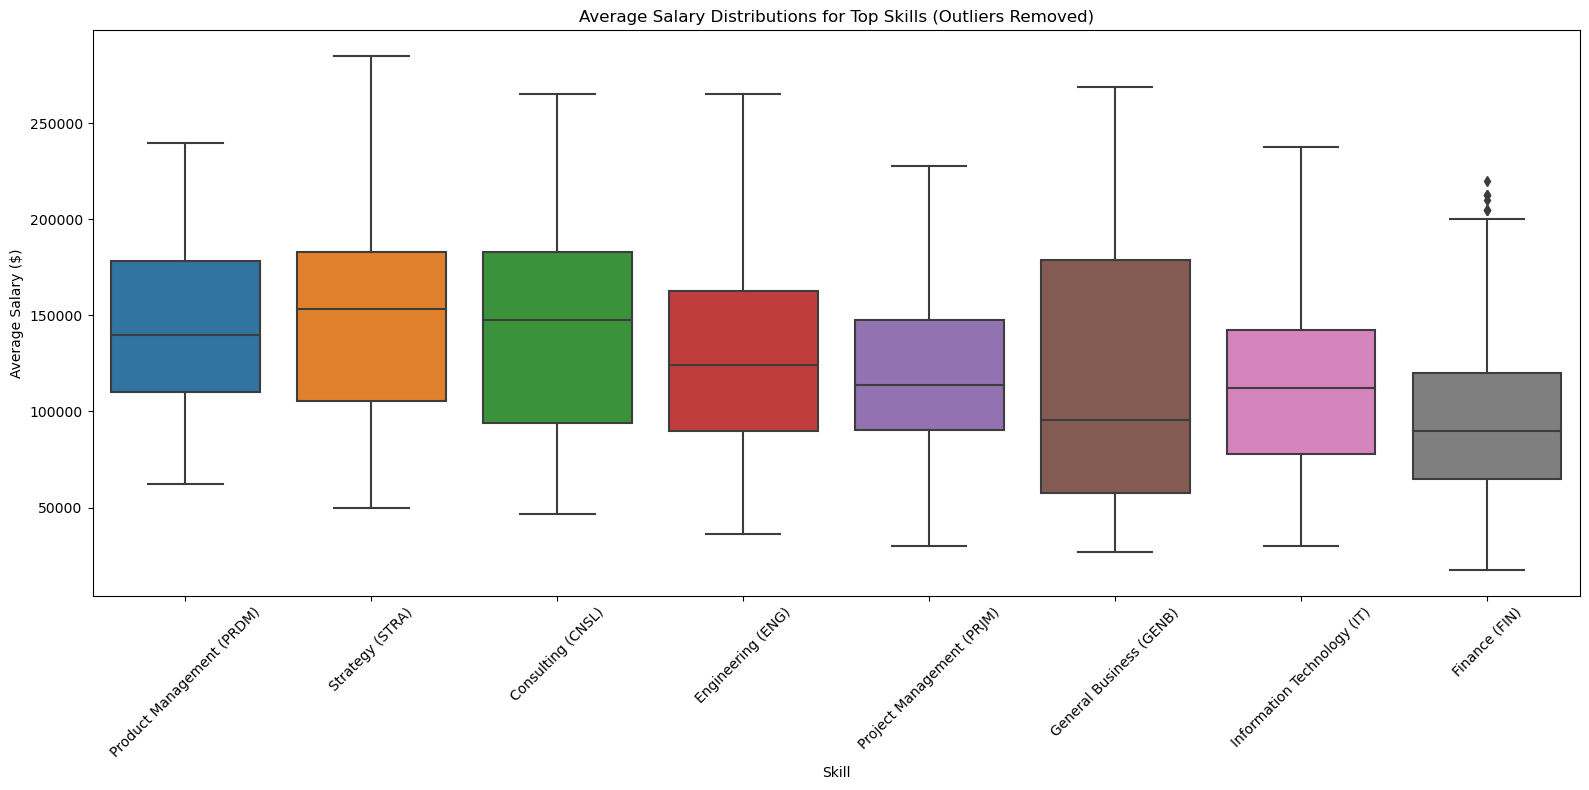

In [12]:
# Recomputing the average salary as the mean of max_salary and min_salary for each job posting
filtered_top_skills_df['avg_salary'] = (filtered_top_skills_df['max_salary'] + filtered_top_skills_df['min_salary']) / 2

# Recreating the box plot using the average salary
plt.figure(figsize=(16, 8))
sns.boxplot(data=filtered_top_skills_df, x='skill_name', y='avg_salary', order=list(skill_name_mapping.values()))
plt.title('Average Salary Distributions for Top Skills (Outliers Removed)')
plt.xlabel('Skill')
plt.ylabel('Average Salary ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\samde\AppData\Local\Temp\ipykernel_56904\1151061761.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_salaries.loc[:, 'avg_salary'] = (df_with_salaries['min_salary'] + df_with_salaries['max_salary']) / 2


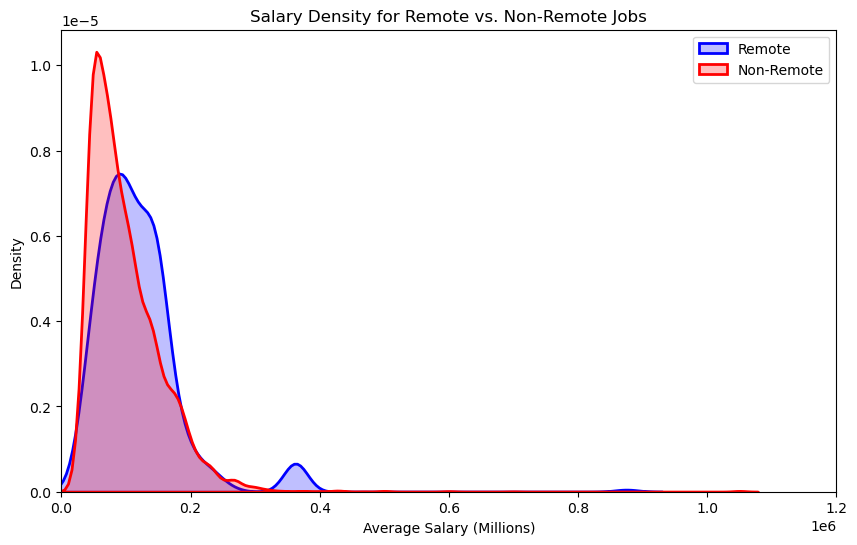

In [13]:
# Filtering data for entries with non-missing salary values
df_with_salaries = filtered_df.dropna(subset=['min_salary', 'max_salary'])

# Calculating average salary for each entry
df_with_salaries.loc[:, 'avg_salary'] = (df_with_salaries['min_salary'] + df_with_salaries['max_salary']) / 2

# Plotting the density curve
plt.figure(figsize=(10, 6))

# Entries where 'remote_allowed' is True
sns.kdeplot(data=df_with_salaries[df_with_salaries['remote_allowed'] == 1.0]['avg_salary'], 
            label='Remote', fill=True, color='blue', linewidth=2)

# Entries where 'remote_allowed' is False or NaN
sns.kdeplot(data=df_with_salaries[df_with_salaries['remote_allowed'].isna()]['avg_salary'], 
            label='Non-Remote', fill=True, color='red', linewidth=2)

plt.title('Salary Density for Remote vs. Non-Remote Jobs')
plt.xlabel('Average Salary (Millions)')
plt.ylabel('Density')
plt.legend()
plt.xlim(0, 1200000)  # Setting x-axis limit to avoid negative values
plt.show()


In [14]:
companies_df = pd.read_csv('/Users/samde/Documents/DATA-1030-Final-Project/companies.csv')

# Merge the 'name' and 'company_size' columns from companies_df with the main dataset based on 'company_id'
filtered_df = pd.merge(filtered_df, companies_df[['company_id', 'name', 'company_size']], on='company_id', how='left')

# Rename the 'name' column to 'company_name' for clarity
filtered_df.rename(columns={'name': 'company_name'}, inplace=True)

# Display the first few rows of the merged dataset to verify the merge
filtered_df.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,career_group,skill_abr,company_name,company_size
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,licensed insurance agent,SALE,NaN,NaN
1,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,licensed insurance agent,BD,NaN,NaN
2,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN,Manager,SALE,CargoLogin.,1.0
3,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN,Manager,BD,CargoLogin.,1.0
4,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,1.690000e+12,NaN,0,CONTRACT,NaN,NaN,model risk auditor,ACCT,Employvision Inc.,1.0


In [30]:
from sklearn.model_selection import KFold

features = ['job_id', 'company_id', 'title', 'formatted_work_type', 'location',
'remote_allowed', 'formatted_experience_level', 'company_size','skill_abr']
target = ['min_salary', 'max_salary']

selected_data = filtered_df[features + target].dropna(subset=target)

num_folds = 5 # five folds based on size of the dataset
kf = KFold(n_splits=num_folds, shuffle = True, random_state = 8)
folds = list(kf.split(selected_data))

# Display the size of each fold
fold_sizes = [(len(train_idx), len(val_idx)) for train_idx, val_idx in folds]
fold_sizes

[(7175, 1794), (7175, 1794), (7175, 1794), (7175, 1794), (7176, 1793)]

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Categorizing the features
categorical_features = ['job_id', 'company_id', 'title','formatted_work_type', 'location', 'formatted_experience_level', 'skill_abr']
ordinal_features = ['company_size']
binary_features = ['remote_allowed']

# Preprocessing transformers
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputing missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Assuming ordinal and binary features require similar preprocessing
ordinal_binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))  # Imputing missing values
])

# Combining the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('ord_bin', ordinal_binary_transformer, ordinal_features + binary_features)
    ], remainder='passthrough'
)

In [32]:
# Calculate percentage of missing values for each feature
missing_data = filtered_df.isnull().sum() / len(filtered_df) * 100

# Filter out features that have any missing values
features_with_missing_values = missing_data[missing_data > 0]
features_with_missing_values

company_id                     1.976594
description                    0.007828
max_salary                    64.894908
med_salary                    93.283494
min_salary                    64.894908
pay_period                    58.178402
applies                       44.534033
remote_allowed                91.569142
views                         16.759951
application_url               36.999491
closed_time                   95.322713
formatted_experience_level    28.678226
skills_desc                   99.162394
posting_domain                41.727661
currency                      58.178402
compensation_type             58.178402
skill_abr                      2.054875
company_name                   2.270148
company_size                   6.207679
dtype: float64

In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

# Define the models
models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor()
}

# Adjusting the Lasso Regression Pipeline
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('model', Lasso(alpha=1, max_iter = 10000))  # Adjust alpha and max_iter as needed
])

# Creating pipelines for each model
pipelines = {name: Pipeline(steps=[('preprocessor', preprocessor), ('model', model)]) for name, model in models.items()}

# Update the pipelines dictionary
pipelines['Lasso Regression'] = lasso_pipeline

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

# Function to evaluate a model on a given fold
def evaluate_model(pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2

# Dictionary to store model performance
model_performance = {name: {'mse': [], 'r2': []} for name in models}

# Looping through each fold
for train_idx, test_idx in folds:
    X_train, y_train = selected_data.iloc[train_idx][features], selected_data.iloc[train_idx][target]
    X_test, y_test = selected_data.iloc[test_idx][features], selected_data.iloc[test_idx][target]
    
    # Training and evaluating each model
    for model_name, pipeline in pipelines.items():
        mse, r2 = evaluate_model(pipeline, X_train, y_train, X_test, y_test)
        model_performance[model_name]['mse'].append(mse)
        model_performance[model_name]['r2'].append(r2)

# Output the aggregated results
for model_name, performance in model_performance.items():
    avg_mse = sum(performance['mse']) / len(performance['mse'])
    avg_r2 = sum(performance['r2']) / len(performance['r2'])
    print(f"{model_name}: Avg MSE = {avg_mse}, Avg R2 = {avg_r2}")

Ridge Regression: Avg MSE = 657620026.188616, Avg R2 = 0.8279477714624093
Lasso Regression: Avg MSE = 661994604.7877723, Avg R2 = 0.8273094972046463
Random Forest: Avg MSE = 1183456005.6026764, Avg R2 = 0.6940084977572869
XGBoost: Avg MSE = 1357245364.6461318, Avg R2 = 0.6429529590812317


In [61]:
from sklearn.model_selection import GridSearchCV

# Parameters for Ridge Regression
ridge_params = {'model__alpha': [0.01, 0.1, 1, 10]}

# Grid Search for Ridge Regression
ridge_grid_search = GridSearchCV(pipelines['Ridge Regression'], param_grid=ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)

# Best parameters and score for Ridge Regression
print("Best Parameters for Ridge Regression:", ridge_grid_search.best_params_)
print("Best Score for Ridge Regression:", -ridge_grid_search.best_score_)

Best Parameters for Ridge Regression: {'model__alpha': 0.1}
Best Score for Ridge Regression: 615550995.431534


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter distribution
lasso_params = {'model__alpha': [0.01, 0.1, 1, 10]}

# Randomized Search for Lasso Regression
lasso_random_search = RandomizedSearchCV(lasso_pipeline, param_distributions=lasso_params, n_iter=4, cv=5, scoring='neg_mean_squared_error', 
    random_state=42, n_jobs=-1)
lasso_random_search.fit(X_train, y_train)

# Output best parameters and score
print("Best Parameters for Lasso Regression:", lasso_random_search.best_params_)
print("Best Score for Lasso Regression:", -lasso_random_search.best_score_)

In [64]:
from sklearn.preprocessing import StandardScaler

# Preprocessing transformers
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputing missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputing missing values
    ('scaler', StandardScaler())  # Add scaling for ordinal and binary features
])

# Combining the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('ord_bin', ordinal_binary_transformer, ordinal_features + binary_features)
    ], remainder='passthrough'
)

# Ridge model pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=.001))
])

# Lasso model pipeline
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=.001))
])

# Fit and evaluate Ridge model
ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("MSE on Test Set for Ridge Regression:", mse_ridge)
r2 = r2_score(y_test, y_pred_ridge)
print("R-squared for Ridge Regression: ", r2)
# Fit and evaluate Lasso model
lasso_pipeline.fit(X_train, y_train)
y_pred_lasso = lasso_pipeline.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("MSE on Test Set for Lasso Regression:", mse_lasso)
r2 = r2_score(y_test, y_pred_lasso)
print("R-squared for Lasso Regression: ", r2)

MSE on Test Set for Ridge Regression: 729986612.8188102
R-squared for Ridge Regression:  0.7580243931081445
MSE on Test Set for Lasso Regression: 1159929647.2957494
R-squared for Lasso Regression:  0.6258161303070103


In [66]:
# Define the pipeline
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', XGBRegressor())])

In [ ]:
# Define the parameter grid for GridSearchCV, ensuring all parameter names are correctly prefixed
pipeline_parameters = {
    'regressor__n_estimators': [100, 200, 500],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__max_depth': [3, 5, 7],
    'regressor__min_child_weight': [1, 3, 5],
    'regressor__gamma': [0, 0.1, 0.2],
    'regressor__subsample': [0.7, 0.8, 1.0],
    'regressor__colsample_bytree': [0.7, 0.8, 1.0],
}
from sklearn.model_selection import RandomizedSearchCV

xgb_random = RandomizedSearchCV(xgb_pipeline, pipeline_parameters, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
xgb_random.fit(X_train, y_train)


# Output the best parameters and score
print("Best parameters:", xgb_random.best_params_)
print("Best score:", xgb_random.best_score_)

In [68]:
# Retrain the model with the best parameters
best_params = {
    'subsample': 0.8,
    'n_estimators': 500,
    'min_child_weight': 1,
    'max_depth': 7,
    'learning_rate': 0.1,
    'gamma': 0.1,
    'colsample_bytree': 0.7
}

# Update the pipeline regressor with the best parameters
xgb_pipeline.set_params(regressor__subsample=best_params['subsample'],
                        regressor__n_estimators=best_params['n_estimators'],
                        regressor__min_child_weight=best_params['min_child_weight'],
                        regressor__max_depth=best_params['max_depth'],
                        regressor__learning_rate=best_params['learning_rate'],
                        regressor__gamma=best_params['gamma'],
                        regressor__colsample_bytree=best_params['colsample_bytree'])

# Fit the model
xgb_pipeline.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import mean_squared_error

y_pred = xgb_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)

MSE:  1214037264.257121
R-squared:  0.6013072030674029


In [38]:

# Create a column transformer with OneHotEncoder for categorical features and SimpleImputer for missing values
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', SimpleImputer(strategy='mean'), [col for col in features if col not in categorical_features])
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Create a pipeline that first transforms the data and then applies the Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),  # Scale the data without centering
    ('regressor', RandomForestRegressor(random_state=8))
])

# Hyperparameters to tune
param_grid = {
    'regressor__max_depth': [3, 5, 10, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Splitting the data into features and target
X = selected_data[features]
y = selected_data[target]

# Grid Search for Random Forest with the pipeline
rf_grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X, y)

# Output the best parameters and the corresponding score
best_params = rf_grid_search.best_params_
best_score = -rf_grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)



Best Parameters: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10}
Best Score: 3173237927.4872274


In [ ]:
# Retrain the model with the best parameters
best_params = {
    'max_depth': None,
    'min_samples_split': 10,
    'min_samples_leaf': 4
}

# Update the pipeline regressor with the best parameters
rf_pipeline.set_params(regressor__max_depth=best_params['max_depth'],
                        regressor__min_samples_split=best_params['min_samples_split'],
                        regressor__mmin_samples_leaf=best_params['min_samples_leaf'])

# Fit the model
rf_pipeline.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import mean_squared_error

y_pred = rf_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)

In [71]:
# Pipeline combining preprocessing and model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge())
])

# Fit the pipeline to your data
model_pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job_id', 'company_id',
                                                   'title',
                                                   'formatted_work_type',
                                                   'location',
                                                   'formatted_experience_level',
                                                   'skill_abr']),
                                                 ('ord_bin',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['company_size',
                                                   'remote_allowed'])])),
                ('model', Ridge())])

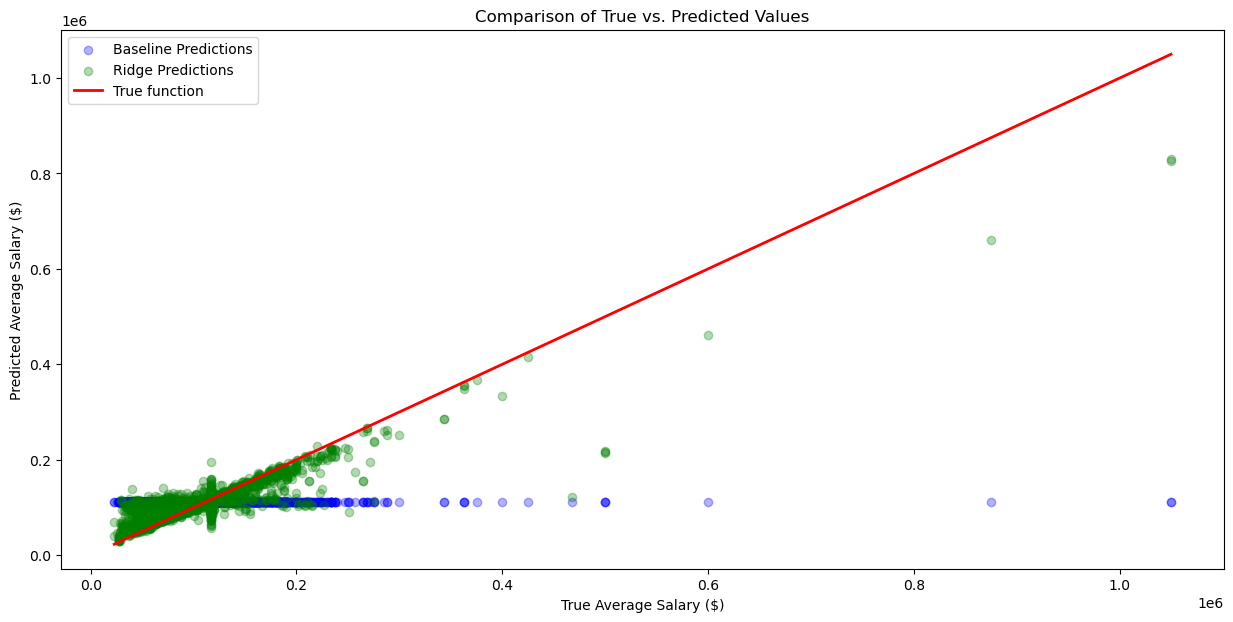

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer

# Replace 'filtered_df' and 'features' with your actual DataFrame and feature columns
X = filtered_df[features]
y_max = filtered_df['max_salary']
y_min = filtered_df['min_salary']

# Handle NaN values in the target columns before averaging
imputer = SimpleImputer(strategy='mean')  # or 'median', depending on your preference
y_max = imputer.fit_transform(y_max.values.reshape(-1, 1)).ravel()
y_min = imputer.transform(y_min.values.reshape(-1, 1)).ravel()

# Create the average salary target by combining the non-NaN max and min salaries
y_avg = (y_max + y_min) / 2

# Split the data into training and testing sets
X_train, X_test, y_train_avg, y_test_avg = train_test_split(X, y_avg, test_size=0.2, random_state=42)

# Assuming 'preprocessor' is already defined and is a valid preprocessing pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge())
])
model_pipeline.fit(X_train, y_train_avg)

# Make predictions with the Ridge model
ridge_predictions = model_pipeline.predict(X_test)

# Calculate the baseline prediction using the mean of the target variable from the training set
baseline_avg_pred = np.full_like(y_test_avg, y_train_avg.mean())

# Create the scatter plot for true values vs model predictions
plt.figure(figsize=(15, 7))
plt.scatter(y_test_avg, baseline_avg_pred, alpha=0.3, color='blue', label='Baseline Predictions')
plt.scatter(y_test_avg, ridge_predictions, alpha=0.3, color='green', label='Ridge Predictions')
plt.plot([y_test_avg.min(), y_test_avg.max()], [y_test_avg.min(), y_test_avg.max()], 'r-', lw=2, label='True function')
plt.xlabel('True Average Salary ($)')
plt.ylabel('Predicted Average Salary ($)')
plt.title('Comparison of True vs. Predicted Values')
plt.legend()
plt.show()


In [128]:
from sklearn.impute import SimpleImputer

# Assuming 'filtered_df' is your DataFrame
# Separate imputers for 'max_salary' and 'min_salary'
imputer_max = SimpleImputer(strategy='mean')
imputer_min = SimpleImputer(strategy='mean')

# Fit the imputer on 'max_salary' and transform 'max_salary'
y_train_max = imputer_max.fit_transform(filtered_df[['max_salary']]).ravel()

# Fit the imputer on 'min_salary' and transform 'min_salary'
y_train_min = imputer_min.fit_transform(filtered_df[['min_salary']]).ravel()

# Create the average salary for y_train
y_train_avg = (y_train_max + y_train_min) / 2


# Perform the train-test split
X_train, X_test, y_train_avg, y_test_avg = train_test_split(X, y_train_avg, test_size=0.2, random_state=42)

# Now calculate the mean of y_train_avg for the baseline prediction
baseline_prediction = np.full(y_test_avg.shape, y_train_avg.mean())

# Calculate the RMSE for the baseline
baseline_rmse = mean_squared_error(y_test_avg, baseline_prediction, squared=False)

# Calculate the R-squared for the baseline
baseline_r2 = r2_score(y_test_avg, baseline_prediction)

print(f'Baseline RMSE: {baseline_rmse:.2f}')
print(f'Baseline R²: {baseline_r2:.2f}')


Baseline RMSE: 40806.26
Baseline R²: -0.00


In [ ]:
# Access the LinearRegression model from the pipeline
linear_model_in_pipeline = model_pipeline.named_steps['model']

# Retrieve the model coefficients
coefficients = linear_model_in_pipeline.coef_

# If your features are transformed, you might need to adjust the way you access feature names
# Assuming 'X' is your original feature DataFrame and you want to get feature names after OneHotEncoding
feature_names_transformed = model_pipeline.named_steps['preprocessor'].transformers_[0][1].named_steps['onehot'].get_feature_names_out(input_features=categorical_features)
feature_names = list(feature_names_transformed) + ordinal_features + binary_features

# Pair each feature with its coefficient
feature_importance = zip(feature_names, coefficients.flatten())  # Flatten in case of multidimensional y

# Sort features by their coefficients
sorted_feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

# Display the feature importance
for feature, coef in sorted_feature_importance:
    print(f"{feature}: {coef}")

In [73]:
# Assuming 'X_train' is your training data and 'model_pipeline' is your pipeline
X_train_preprocessed = model_pipeline.named_steps['preprocessor'].transform(X_train)


In [74]:
import shap

# Create the SHAP KernelExplainer
explainer = shap.KernelExplainer(model_pipeline.named_steps['model'].predict, shap.sample(X_train_preprocessed, 100))

# Calculate SHAP values for a sample of the test set (to save computation time)
shap_values = explainer.shap_values(shap.sample(X_train_preprocessed, 100))


  0%|          | 0/100 [00:00<?, ?it/s]

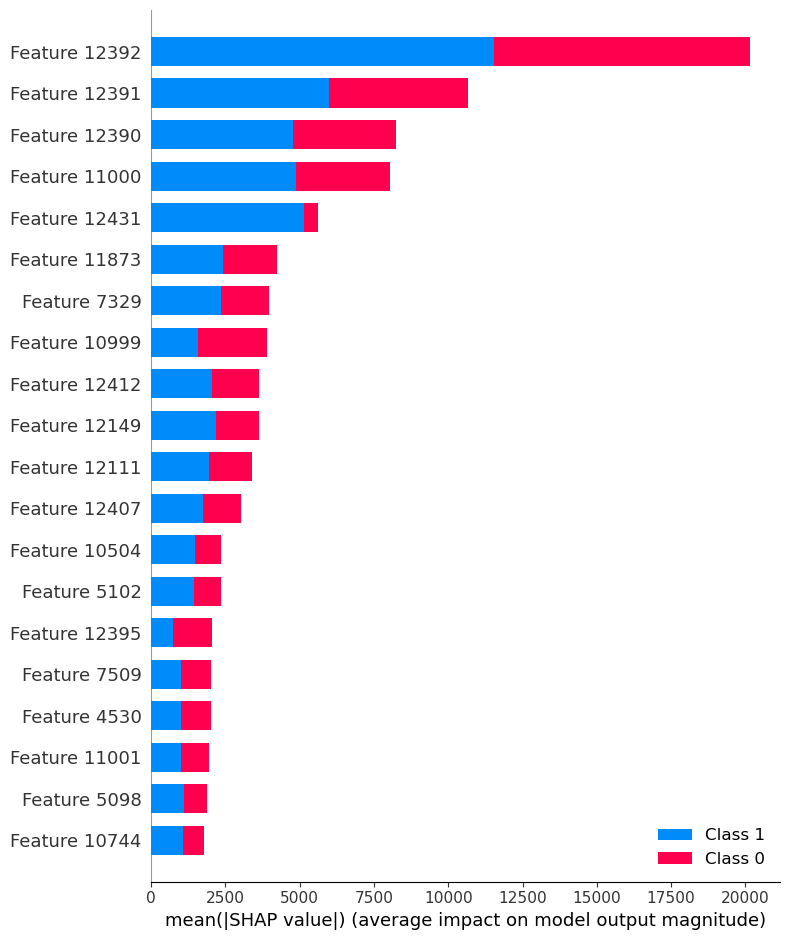

In [75]:
# Plot the SHAP values - summary plot
shap.summary_plot(shap_values, shap.sample(X_train_preprocessed, 100))


In [76]:
onehot_features = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)


other_features = ordinal_features + binary_features  # Adjust this line to match your actual feature names

# Combine all feature names into a single list
all_feature_names = list(onehot_features) + other_features

# Now you can map the feature numbers to these names
feature_number_to_name_mapping = {f"Feature {i}": name for i, name in enumerate(all_feature_names)}


In [77]:
# List of feature numbers as they appear in your SHAP summary plot
feature_numbers = [
    "Feature 12392", "Feature 11000", "Feature 12391", "Feature 12390", "Feature 12115",
    "Feature 12431", "Feature 10999", "Feature 5083", "Feature 11873", "Feature 10504",
    "Feature 7127", "Feature 11003", "Feature 5118", "Feature 11246", "Feature 5575",
    "Feature 9116", "Feature 5907", "Feature 10323", "Feature 9144", "Feature 3499"
]

# Loop through the feature numbers and print the corresponding feature names
for feature_number in feature_numbers:
    print(feature_number_to_name_mapping[feature_number])

formatted_experience_level_Entry level
formatted_work_type_Full-time
formatted_experience_level_Director
formatted_experience_level_Associate
location_San Francisco, CA
company_size
formatted_work_type_Contract
company_id_1063.0
location_New York, NY
title_Software Engineering Manager II, Google Cloud Unified Fulfillment Optimization
company_id_76252253.0
formatted_work_type_Part-time
company_id_1668.0
location_Chicago, IL
company_id_42134.0
title_Locum Anesthesiologist
company_id_256744.0
title_Senior Principal Technical Program Manager - Platform Engineering
title_Machine Learning Engineer, Senior
job_id_3699082311


Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


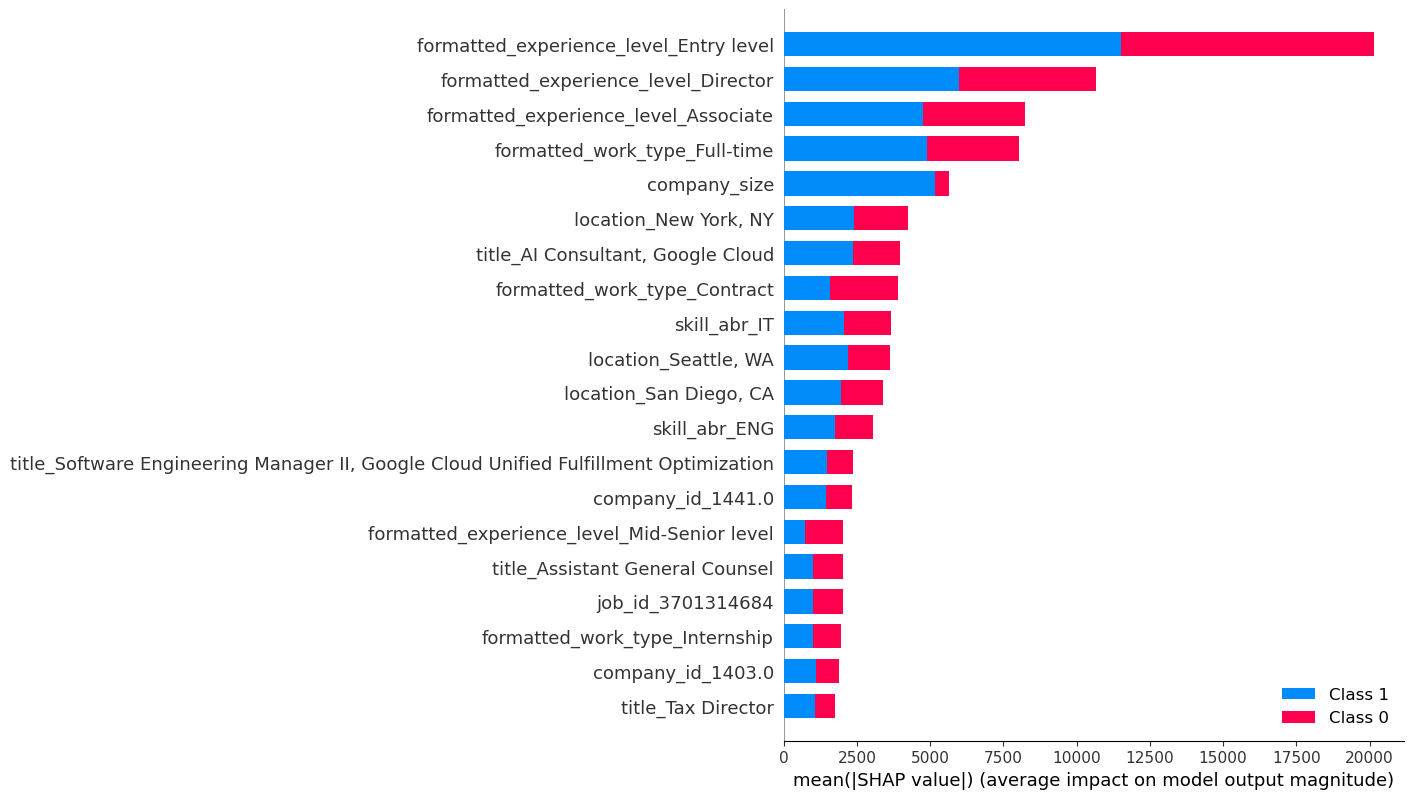

In [78]:
# Ensure this list is in the same order as the columns in X_train_preprocessed
all_feature_names = list(onehot_features) + other_features

# Now, use the all_feature_names list when calling the SHAP summary plot
shap.summary_plot(shap_values, shap.sample(X_train_preprocessed, 100), feature_names=all_feature_names)

In [95]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np

def evaluate_model(model, X, y, categorical_features, folds=5):
    kf = KFold(n_splits=folds)
    scores = []

    # Initialize encoder and imputer
    encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with 'median' or 'most_frequent' if more appropriate

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Encoding categorical features
        X_train_encoded = encoder.fit_transform(X_train[categorical_features])
        X_test_encoded = encoder.transform(X_test[categorical_features])

        # Impute missing values
        X_train_imputed = imputer.fit_transform(X_train.drop(columns=categorical_features))
        X_test_imputed = imputer.transform(X_test.drop(columns=categorical_features))

        # Combine encoded and imputed features
        X_train_prepared = np.concatenate([X_train_imputed, X_train_encoded], axis=1)
        X_test_prepared = np.concatenate([X_test_imputed, X_test_encoded], axis=1)

        model.fit(X_train_prepared, y_train)
        predictions = model.predict(X_test_prepared)
        score = mean_squared_error(y_test, predictions, squared=False)
        scores.append(score)

    return scores
    
categorical_features = ['job_id', 'company_id', 'title','formatted_work_type', 'location', 'formatted_experience_level', 'skill_abr']
scores_for_model_1 = evaluate_model(Ridge(), X, y, categorical_features)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [97]:
scores_for_model_2 = evaluate_model(Lasso(), X, y, categorical_features)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.451e+10, tolerance: 1.621e+09
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.476e+11, tolerance: 4.907e+09
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.854e+10, tolerance: 1.675e+09
Objective did not converge. You might want to increase the number of iterations, check the sc

In [99]:
scores_for_model_3 = evaluate_model(RandomForestRegressor(), X, y, categorical_features)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [102]:
scores_for_model_4 = evaluate_model(XGBRegressor(), X, y, categorical_features)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


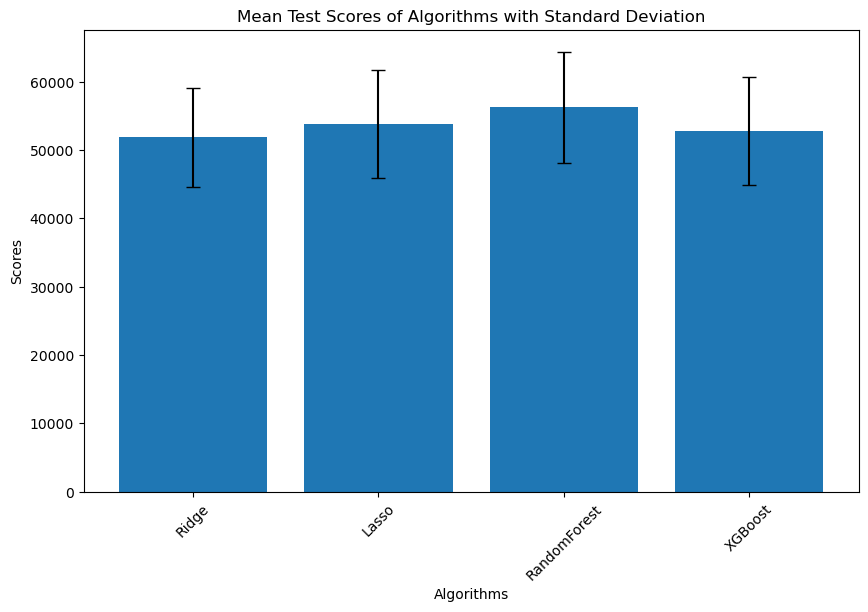

In [103]:
mean_scores = []
std_devs = []

for scores in [scores_for_model_1, scores_for_model_2, scores_for_model_3, scores_for_model_4]:
    mean_scores.append(np.mean(scores))
    std_devs.append(np.std(scores))

algorithm_names = ['Ridge', 'Lasso', 'RandomForest','XGBoost'] 
plt.figure(figsize=(10, 6))
plt.bar(algorithm_names, mean_scores, yerr=std_devs, capsize=5)
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Mean Test Scores of Algorithms with Standard Deviation')
plt.xticks(rotation=45)
plt.show()

In [121]:
def get_feature_names(column_transformer):
    feature_names = []
    for transformer_name, transformer, original_features in column_transformer.transformers_[:-1]:  # skip 'remainder'
        if hasattr(transformer, 'get_feature_names_out'):
            if transformer_name == 'onehot':
                names = transformer.get_feature_names_out(original_features)
            else:
                names = transformer.get_feature_names_out()
        else:
            names = original_features
        feature_names.extend(names)
    return feature_names

# Assuming 'preprocessor' is the preprocessor in your pipeline
preprocessor = model_pipeline.named_steps['preprocessor']
feature_names = get_feature_names(preprocessor)

# Get the coefficients from the Ridge model
ridge_model = model_pipeline.named_steps['model']
coefficients = ridge_model.coef_

# Map the coefficients to the feature names
feature_importance = dict(zip(feature_names, coefficients))

# Now extract the importances for the specific features
# We need to account for the possibility that the feature names have been changed by one-hot encoding
specific_features = ['location', 'formatted_experience_level', 'company_size']
specific_importances = {}
for original_feature in specific_features:
    for transformed_feature in feature_names:
        if original_feature in transformed_feature:
            specific_importances[transformed_feature] = feature_importance[transformed_feature]

# Print the feature importances
for feature, importance in specific_importances.items():
    print(f"{feature}: {importance}")

title_Allocation Analyst: -12071.771044430014
title_Competence Manager-Electrical Systems - Guaranteed sign on bonus and relocation: 985.5696075655909
title_Division Director - Relocation Assistance Available: -2602.6209918911977
title_Full-Stack Software Engineer - Python, React (Any US COE location, Austin, TX | Irving, TX | Ft Myers, FL): -250.12411167107805
title_Pharmacy Manager Store 423 – **Relocation  Available* Hilton Head, SC: 6517.544684793924
title_Qualification Engineer (travel or relocation): 6630.219205563402
title_Semi-Conductor Equipment Engineer Wafer Alignment- Guaranteed sign on bonus and relocation: 985.5696075655909
title_Sr. EH&S Specialist - Guaranteed sign on bonus and relocation: 2123.6880725147757
title_Staff Pharmacist Store 423 – Modified Hours **Relocation Available** Hilton Head, SC: -1213.5698609271242
location_Abbeville, SC: 245.68257309176934
location_Aberdeen Proving Ground, MD: -5569.082484985962
location_Aberdeen, MD: 4510.536103585057
location_Abil

In [122]:
# Assuming you have a pipeline `model_pipeline` with a `ColumnTransformer` named 'preprocessor'
# and a Ridge regression model named 'model'

# Get the preprocessor and the model from the pipeline
preprocessor = model_pipeline.named_steps['preprocessor']
ridge_model = model_pipeline.named_steps['model']

# Extract feature names after preprocessing
# This assumes that the last step of your ColumnTransformer is not dropping any columns ('remainder' parameter)
# Adjust the function accordingly if your setup is different
feature_names = preprocessor.get_feature_names_out()

# Extract coefficients
coefficients = ridge_model.coef_

# Create a dictionary mapping feature names to their coefficients
feature_importance_dict = dict(zip(feature_names, coefficients))

# For one-hot encoded features, you may want to sum up the importances
# This is a simple approach where we just sum the absolute values of the coefficients for related dummy variables
importance_location = sum(abs(coef) for feature, coef in feature_importance_dict.items() if 'location' in feature)
importance_experience_level = sum(abs(coef) for feature, coef in feature_importance_dict.items() if 'formatted_experience_level' in feature)
importance_company_size = sum(abs(coef) for feature, coef in feature_importance_dict.items() if 'company_size' in feature)

# Print out the aggregated feature importances
print('Importance of location:', importance_location)
print('Importance of formatted_experience_level:', importance_experience_level)
print('Importance of company_size:', importance_company_size)

# Discussing findings:
# You would interpret these aggregated importances in the context of your specific problem and dataset.
# A higher importance value suggests that the feature has a larger effect on the model's predictions.
# However, you should also consider the direction (positive or negative) of the effect, which is indicated by the sign of the coefficients before aggregation.

Importance of location: 13582569.811078914
Importance of formatted_experience_level: 69402.58376746583
Importance of company_size: 1836.0917654181799
